# Welly Multi Well Projects

In [1]:
from welly import Project
import pandas as pd
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.8/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: tplib2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 4.0.0-unsupported is an invalid version and will not be supported in a future release
  warnings.warn(


In [2]:
# Loading wells using Project
wells = Project.from_las('/Users/isaacabrahamodeh/Desktop/Taranaki-wells/Taranaki/*.las')

0it [00:00, ?it/s]Only engine='normal' can read wrapped files
1it [00:00,  1.09it/s]Only engine='normal' can read wrapped files
3it [00:02,  1.53it/s]Only engine='normal' can read wrapped files
8it [00:04,  1.95it/s]


### Well Meta Data

In [3]:
#Viewing contents of wells
wells

Index,UWI,Data,Curves
0,100000113536,14 curves,"BS, CALI, DENS, DRHO, DTC, GR, NEUT, PEF, RESD, RESM, RESS, SP, TEMP, TENS"
1,100000113531,14 curves,"BS, CALI, DENS, DRHO, DTC, GR, NEUT, PEF, RESD, RESM, RESS, SP, TEMP, TENS"
2,100000223430,13 curves,"BS, CALI, DENS, DRHO, DTC, GR, NEUT, PEF, RESD, RESS, SP, TEMP, TENS"
3,100000113532,14 curves,"BS, CALI, DENS, DRHO, DTC, GR, NEUT, PEF, RESD, RESM, RESS, SP, TEMP, TENS"
4,100000022053,14 curves,"BS, CALI, DENS, DRHO, DTC, GR, GR_CORR, NEUT, NEUT_CORR, RESD, RESD_CORR, RESS, RESS_CORR, SP"
5,100000022053,10 curves,"BS, CALI, DENS, DRHO, DTC, GR, NEUT, RESD, RESS, SP"
6,100000022050,10 curves,"BS, CALI, DENS, DRHO, DTC, GR, NEUT, RESD, RESS, TEMP"
7,100000022052,10 curves,"BS, CALI, DENS, DRHO, DTC, GR, NEUT, RESD, RESS, SP"


In [4]:
# Call upon UWIs
wells.uwis

['100000113536',
 '100000113531',
 '100000223430',
 '100000113532',
 '100000022053',
 '100000022053',
 '100000022050',
 '100000022052']

In [6]:
# Print individual well details
for well in wells:
    print(well)

Well(uwi: '100000113536', name: 'Maui-7', 14 curves: ['BS', 'CALI', 'DENS', 'DRHO', 'DTC', 'GR', 'NEUT', 'PEF', 'RESD', 'RESM', 'RESS', 'SP', 'TEMP', 'TENS'])
Well(uwi: '100000113531', name: 'Maui-6', 14 curves: ['BS', 'CALI', 'DENS', 'DRHO', 'DTC', 'GR', 'NEUT', 'PEF', 'RESD', 'RESM', 'RESS', 'SP', 'TEMP', 'TENS'])
Well(uwi: '100000223430', name: 'Rahi-1', 13 curves: ['BS', 'CALI', 'DENS', 'DRHO', 'DTC', 'GR', 'NEUT', 'PEF', 'RESD', 'RESS', 'SP', 'TEMP', 'TENS'])
Well(uwi: '100000113532', name: 'Maui-5', 14 curves: ['BS', 'CALI', 'DENS', 'DRHO', 'DTC', 'GR', 'NEUT', 'PEF', 'RESD', 'RESM', 'RESS', 'SP', 'TEMP', 'TENS'])
Well(uwi: '100000022053', name: 'Maui-3', 14 curves: ['BS', 'CALI', 'DENS', 'DRHO', 'DTC', 'GR', 'GR_CORR', 'NEUT', 'NEUT_CORR', 'RESD', 'RESD_CORR', 'RESS', 'RESS_CORR', 'SP'])
Well(uwi: '100000022053', name: 'Maui-3', 10 curves: ['BS', 'CALI', 'DENS', 'DRHO', 'DTC', 'GR', 'NEUT', 'RESD', 'RESS', 'SP'])
Well(uwi: '100000022050', name: 'Maui-4', 10 curves: ['BS', 'CALI'

In [8]:
# Print well name and location
for well in wells:
    print(f'{well.location.latitude} \t {well.location.longitude}'.expandtabs(10))

-39.6351864          173.3207531
-39.5296319          173.4074213
-39.7164729          173.3434684
-39.616576           173.3768647
-39.5346325          173.4515882
-39.5346325          173.4515882
-40.0383342          173.2410221
-39.6110213          173.4496429


In [10]:
# Create a dataframe of well header information

well_dict = {}
for well in wells:
    well_dict[well.uwi] = {'Latitude':well.location.latitude,
                          'Longitude':well.location.longitude}

wells_df = pd.DataFrame.from_dict(well_dict, orient='index')

wells_df.reset_index(inplace=True)

wells_df.rename(columns={'index':'UWI'}, inplace=True)



In [11]:
wells_df

,UWI,Latitude,Longitude
0,100000113536,-39.6351864,173.3207531
1,100000113531,-39.5296319,173.4074213
2,100000223430,-39.7164729,173.3434684
3,100000113532,-39.6165760,173.3768647
4,100000022053,-39.5346325,173.4515882
5,100000022050,-40.0383342,173.2410221
6,100000022052,-39.6110213,173.4496429


## Mapping the Well Locations

In [12]:
import folium

In [18]:
mean_lat = wells_df['Latitude'].mean()
mean_long = wells_df['Longitude'].mean()

m = folium.Map(location=[mean_lat, mean_long],zoom_start=7)

for index, well_location in wells_df.iterrows():
    folium.Marker([well_location['Latitude'], well_location['Longitude']],
                 popup=well_location).add_to(m)
m

## Plotting Curves from Multiple Wells

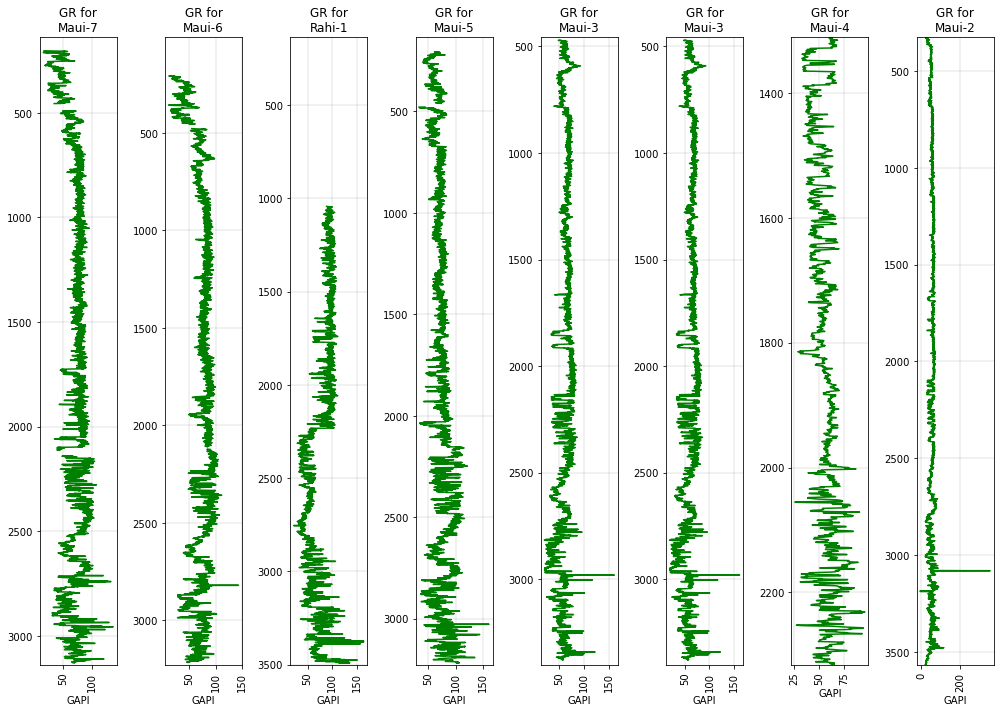

In [22]:
#Plot GR from all wells
fig, axs = plt.subplots(figsize=(14, 10), ncols=len(wells))

for i, (ax, well) in enumerate(zip(axs, wells)):
    gr = well.get_curve('GR')
    if gr is not None:
        ax = gr.plot(ax=ax, c='green')
    ax.set_title(f"GR for\n{well.name}")

plt.tight_layout()
plt.show()

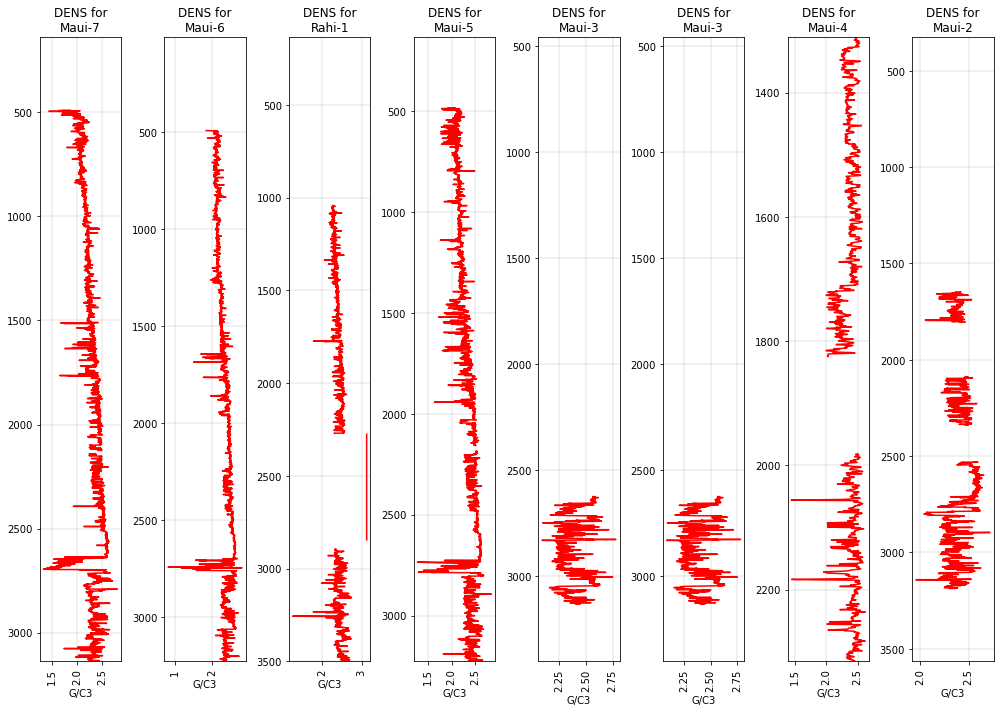

In [23]:
fig, axs = plt.subplots(figsize=(14, 10), ncols=len(wells))

curve_name = 'DENS'

for i, (ax, well) in enumerate(zip(axs, wells)):
    gr = well.get_curve(curve_name)
    if gr is not None:
        ax = gr.plot(ax=ax, c='red')
    ax.set_title(f"{curve_name} for\n{well.name}")

plt.tight_layout()
plt.show()

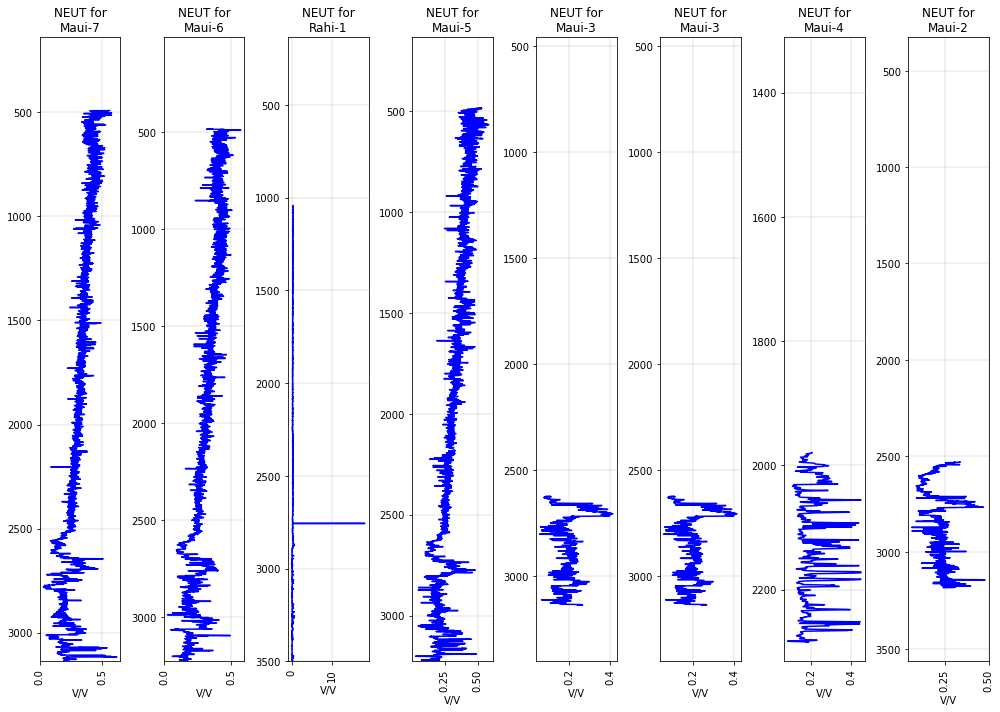

In [26]:
fig, axs = plt.subplots(figsize=(14, 10), ncols=len(wells))

curve_name = 'NEUT'

for i, (ax, well) in enumerate(zip(axs, wells)):
    gr = well.get_curve(curve_name)
    if gr is not None:
        ax = gr.plot(ax=ax, c='blue')
    ax.set_title(f"{curve_name} for\n{well.name}")

plt.tight_layout()
plt.show()

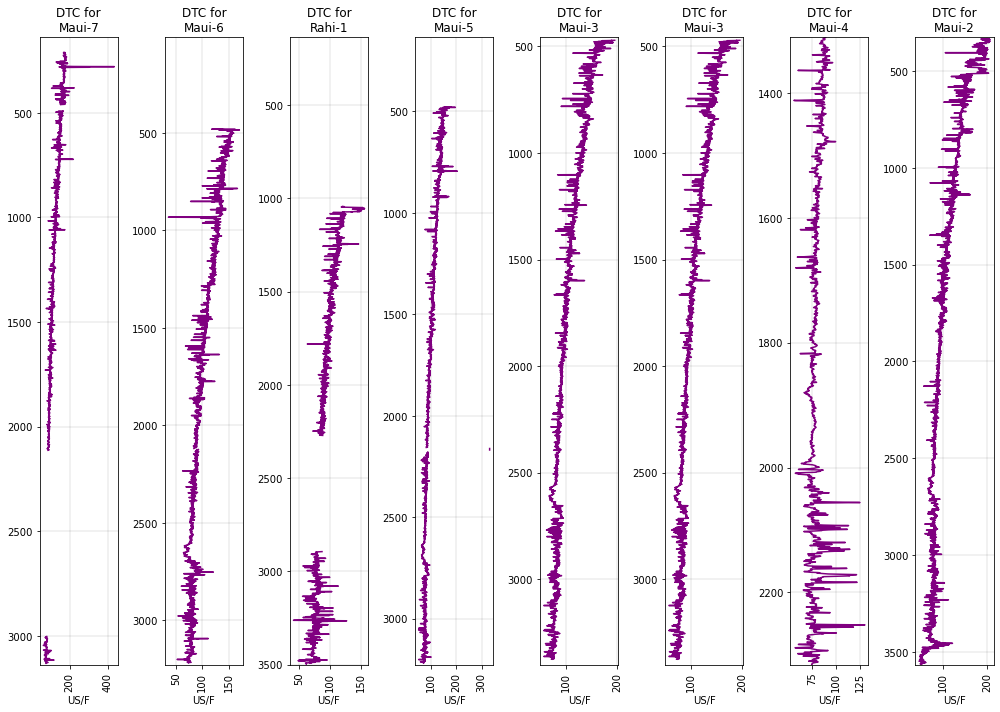

In [27]:
fig, axs = plt.subplots(figsize=(14, 10), ncols=len(wells))

curve_name = 'DTC'

for i, (ax, well) in enumerate(zip(axs, wells)):
    gr = well.get_curve(curve_name)
    if gr is not None:
        ax = gr.plot(ax=ax, c='purple')
    ax.set_title(f"{curve_name} for\n{well.name}")

plt.tight_layout()
plt.show()

## Well Log Data Quality

In [29]:
import welly.quality as wq
from IPython.display import HTML

In [30]:
tests = {'Each': [wq.no_flat,
                 wq.no_gaps,
                 wq.not_empty],
        'GR': [
                wq.all_positive,
                wq.all_between(0, 250),
                wq.check_units(['API', 'GAPI']),
        ],
        'DENS': [
                wq.all_positive,
                wq.all_between(1.5, 3),
                wq.check_units(['G/CC', 'g/cm3']),
        ]}

In [31]:
data_qc_table = wells.curve_table_html(keys=['GR', 'DENS'], tests=tests)
HTML(data_qc_table)

Idx,UWI,Data,Passing,GR,DENS
,,,%,8/8 wells,8/8 wells
0,100000113536,2/14 curves,67,GR⬤71.88 GAPI,DENS⬤2.29 G/C3
1,100000113531,2/14 curves,75,GR⬤74.07 GAPI,DENS⬤2.31 G/C3
2,100000223430,2/13 curves,67,GR⬤76.00 GAPI,DENS⬤2.58 G/C3
3,100000113532,2/14 curves,67,GR⬤74.00 GAPI,DENS⬤2.30 G/C3
4,100000022053,2/14 curves,92,GR⬤61.23 GAPI,DENS⬤2.38 G/C3
5,100000022053,2/10 curves,92,GR⬤61.23 GAPI,DENS⬤2.38 G/C3
6,100000022050,2/10 curves,75,GR⬤55.10 GAPI,DENS⬤2.38 G/C3
7,100000022052,2/10 curves,58,GR⬤55.95 GAPI,DENS⬤2.40 G/C3


In [33]:
qc_dict = {}
for well in wells:
    qc_dict[well.name] = well.qc_table_html(tests)
    

In [35]:
HTML(qc_dict['Maui-2'])

Curve,Passed,Score,all_between,all_positive,no_flat,no_gaps,check_units,not_empty
BS,2 / 3,0.667,,,False,True,,True
CALI,3 / 3,1.000,,,True,True,,True
DENS,4 / 6,0.667,True,True,True,False,False,True
DRHO,2 / 3,0.667,,,True,False,,True
DTC,2 / 3,0.667,,,True,False,,True
GR,3 / 6,0.500,False,False,True,False,True,True
NEUT,3 / 3,1.000,,,True,True,,True
RESD,2 / 3,0.667,,,True,False,,True
RESS,2 / 3,0.667,,,True,False,,True
SP,2 / 3,0.667,,,True,False,,True


In [37]:
HTML(qc_dict['Maui-3'])

Curve,Passed,Score,all_between,all_positive,no_flat,no_gaps,check_units,not_empty
BS,2 / 3,0.667,,,False,True,,True
CALI,3 / 3,1.000,,,True,True,,True
DENS,5 / 6,0.833,True,True,True,True,False,True
DRHO,2 / 3,0.667,,,True,False,,True
DTC,3 / 3,1.000,,,True,True,,True
GR,6 / 6,1.000,True,True,True,True,True,True
NEUT,3 / 3,1.000,,,True,True,,True
RESD,2 / 3,0.667,,,True,False,,True
RESS,3 / 3,1.000,,,True,True,,True
SP,3 / 3,1.000,,,True,True,,True


In [38]:
HTML(qc_dict['Maui-4'])

Curve,Passed,Score,all_between,all_positive,no_flat,no_gaps,check_units,not_empty
BS,2 / 3,0.667,,,False,True,,True
CALI,2 / 3,0.667,,,True,False,,True
DENS,3 / 6,0.500,False,True,True,False,False,True
DRHO,2 / 3,0.667,,,True,False,,True
DTC,3 / 3,1.000,,,True,True,,True
GR,6 / 6,1.000,True,True,True,True,True,True
NEUT,3 / 3,1.000,,,True,True,,True
RESD,2 / 3,0.667,,,True,False,,True
RESS,3 / 3,1.000,,,True,True,,True
TEMP,3 / 3,1.000,,,True,True,,True


In [39]:
HTML(qc_dict['Maui-5'])

Curve,Passed,Score,all_between,all_positive,no_flat,no_gaps,check_units,not_empty
BS,2 / 3,0.667,,,False,True,,True
CALI,2 / 3,0.667,,,True,False,,True
DENS,3 / 6,0.500,False,True,True,False,False,True
DRHO,2 / 3,0.667,,,True,False,,True
DTC,2 / 3,0.667,,,True,False,,True
GR,5 / 6,0.833,True,True,True,False,True,True
NEUT,2 / 3,0.667,,,True,False,,True
PEF,2 / 3,0.667,,,True,False,,True
RESD,2 / 3,0.667,,,True,False,,True
RESM,1 / 3,0.333,,,False,False,,True


In [40]:
HTML(qc_dict['Maui-6'])

Curve,Passed,Score,all_between,all_positive,no_flat,no_gaps,check_units,not_empty
BS,2 / 3,0.667,,,False,True,,True
CALI,2 / 3,0.667,,,True,False,,True
DENS,4 / 6,0.667,False,True,True,True,False,True
DRHO,3 / 3,1.000,,,True,True,,True
DTC,2 / 3,0.667,,,True,False,,True
GR,5 / 6,0.833,True,True,True,False,True,True
NEUT,3 / 3,1.000,,,True,True,,True
PEF,3 / 3,1.000,,,True,True,,True
RESD,2 / 3,0.667,,,True,False,,True
RESM,2 / 3,0.667,,,True,False,,True


In [41]:
HTML(qc_dict['Maui-7'])

Curve,Passed,Score,all_between,all_positive,no_flat,no_gaps,check_units,not_empty
BS,2 / 3,0.667,,,False,True,,True
CALI,2 / 3,0.667,,,True,False,,True
DENS,3 / 6,0.500,False,True,True,False,False,True
DRHO,3 / 3,1.000,,,True,True,,True
DTC,2 / 3,0.667,,,True,False,,True
GR,5 / 6,0.833,True,True,True,False,True,True
NEUT,3 / 3,1.000,,,True,True,,True
PEF,2 / 3,0.667,,,True,False,,True
RESD,2 / 3,0.667,,,True,False,,True
RESM,2 / 3,0.667,,,True,False,,True


In [42]:
HTML(qc_dict['Rahi-1'])

Curve,Passed,Score,all_between,all_positive,no_flat,no_gaps,check_units,not_empty
BS,2 / 3,0.667,,,False,True,,True
CALI,2 / 3,0.667,,,True,False,,True
DENS,2 / 6,0.333,False,True,False,False,False,True
DRHO,2 / 3,0.667,,,True,False,,True
DTC,2 / 3,0.667,,,True,False,,True
GR,6 / 6,1.000,True,True,True,True,True,True
NEUT,2 / 3,0.667,,,True,False,,True
PEF,2 / 3,0.667,,,True,False,,True
RESD,2 / 3,0.667,,,True,False,,True
RESS,2 / 3,0.667,,,True,False,,True


## Well Data to Dataframe

In [43]:
df = wells.df()

In [44]:
df

BS  CALI  DENS  DRHO            DTC  \
UWI          DEPTH                                                    
100000113536 139.5984000000   36.0   NaN   NaN   NaN            NaN   
             139.7508000000   36.0   NaN   NaN   NaN            NaN   
             139.9032000000   36.0   NaN   NaN   NaN            NaN   
             140.0556000000   36.0   NaN   NaN   NaN            NaN   
             140.2080000000   36.0   NaN   NaN   NaN            NaN   
...                            ...   ...   ...   ...            ...   
100000022052 3565.0931999988   NaN   NaN   NaN   NaN  52.8656999995   
             3565.2455999988   NaN   NaN   NaN   NaN  52.8444000002   
             3565.3979999988   NaN   NaN   NaN   NaN  52.8231000002   
             3565.5503999988   NaN   NaN   NaN   NaN            NaN   
             3565.7027999988   NaN   NaN   NaN   NaN            NaN   

                                         GR  NEUT  PEF           RESD  RESM  \
UWI          DEPTH                                                            
100000113536 139.5984000000             NaN   NaN  NaN            NaN   NaN   
             139.7508000000             NaN   NaN  NaN            NaN   NaN   
             139.9032000000             NaN   NaN  NaN            NaN   NaN   
             140.0556000000             NaN   NaN  NaN            NaN   NaN   
             140.2080000000             NaN   NaN  NaN            NaN   NaN   
...                                     ...   ...  ...            ...   ...   
100000022052 3565.0931999988  27.6703999960   NaN  NaN  91.8273000202   NaN   
             3565.2455999988  27.3670000024   NaN  NaN  89.1521000212   NaN   
             3565.3979999988  27.0635000024   NaN  NaN  86.4769000212   NaN   
             3565.5503999988  26.1108000075   NaN  NaN            NaN   NaN   
             3565.7027999988  23.8440000179   NaN  NaN            NaN   NaN   

                              RESS            SP  TEMP  TENS  GR_CORR  \
UWI          DEPTH                                                      
100000113536 139.5984000000    NaN           NaN   NaN   NaN      NaN   
             139.7508000000    NaN           NaN   NaN   NaN      NaN   
             139.9032000000    NaN           NaN   NaN   NaN      NaN   
             140.0556000000    NaN           NaN   NaN   NaN      NaN   
             140.2080000000    NaN           NaN   NaN   NaN      NaN   
...                            ...           ...   ...   ...      ...   
100000022052 3565.0931999988   NaN -1.4141999986   NaN   NaN      NaN   
             3565.2455999988   NaN -1.7376999974   NaN   NaN      NaN   
             3565.3979999988   NaN -2.0612999974   NaN   NaN      NaN   
             3565.5503999988   NaN -2.2293999987   NaN   NaN      NaN   
             3565.7027999988   NaN -2.0830000012   NaN   NaN      NaN   

                              NEUT_CORR  RESD_CORR  RESS_CORR  
UWI          DEPTH                                             
100000113536 139.5984000000         NaN        NaN        NaN  
             139.7508000000         NaN        NaN        NaN  
             139.9032000000         NaN        NaN        NaN  
             140.0556000000         NaN        NaN        NaN  
             140.2080000000         NaN        NaN        NaN  
...                                 ...        ...        ...  
100000022052 3565.0931999988        NaN        NaN        NaN  
             3565.2455999988        NaN        NaN        NaN  
             3565.3979999988        NaN        NaN        NaN  
             3565.5503999988        NaN        NaN        NaN  
             3565.7027999988        NaN        NaN        NaN  

[149632 rows x 18 columns]